# Sentiment Analysis - Data Exploration
------------------------------------
## Initialize Libraries

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

## Import Data

In [2]:
df=pd.read_json('data/reviews.json.gz',lines=True,compression='gzip')
df.shape

(28798, 9)

## Pre-Processing

In [3]:
df.head()

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
0,A6VPK7X53QNAQ,B0000CC64W,"AmazonDiva ""Keep Calm and Carry On.""","[5, 5]","I am a devotee to this serum, it does wonders ...",5,If I had to choose only one product to take ca...,1245283200,"06 18, 2009"
1,A3CHMHGSJSQ02J,B0000CC64W,Anon. A. Non,"[2, 2]","As a woman nearing 50, I need all the help I c...",5,Makes my skin lovely and smooth,1358467200,"01 18, 2013"
2,A1V1EP514B5H7Y,B0000CC64W,asiana,"[0, 0]",I've used this regenerating serum for more tha...,5,Works well at a reasonable price,1322524800,"11 29, 2011"
3,A1X2LENOF84LCQ,B0000CC64W,"D ""D""","[62, 75]",I have tried so many products to just be total...,4,This does work ladies,1113350400,"04 13, 2005"
4,A2PATWWZAXHQYA,B0000CC64W,Farnoosh Brock,"[1, 1]",I love Oil of Olay. My primary moisturizer is ...,1,Did not like the feel/texture of this serum,1387584000,"12 21, 2013"


In [4]:
df.isnull().sum()

reviewerID          0
asin                0
reviewerName      222
helpful             0
reviewText          0
overall             0
summary             0
unixReviewTime      0
reviewTime          0
dtype: int64

We have shown that the dataset has almost 29,000 rows of data and that the only missing data is 222 instances of the reviewer's name, which will have no impact on the results of sentiment analysis. Therefore, we can proceed.

## Data Visualizations

Number of Characters in Each Review


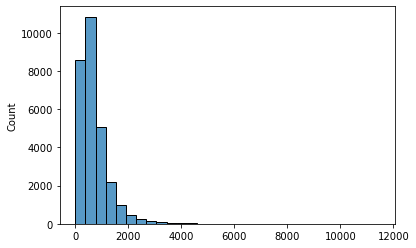

In [5]:
review_length = []

for i in df.reviewText:
    review_length.append(len(i))
    
print('Number of Characters in Each Review')
sns.histplot(x = review_length, bins = 30);

Frequency of Each Rating


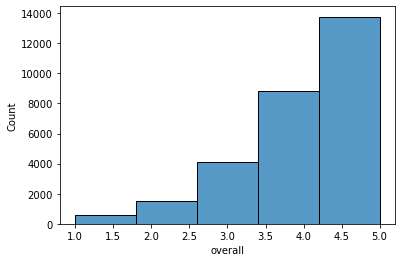

In [6]:
print('Frequency of Each Rating')
sns.histplot(x = df['overall'], bins = 5);

## Clean and Process Dataset

### Create `y` column for positive/negative sentiment

We chose to include scores 1-2 for `negative`, 3 for `neutral`, and 4-5 for `positive`.

In [7]:
def assign_sent(x):
    if x['overall'] <= 2:
        return 'negative'
    if x['overall'] == 3:
        return 'neutral'
    if x['overall'] > 3:
        return 'positive'

In [8]:
df['sentiment'] = df.apply(assign_sent, axis = 1)
df

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime,sentiment
0,A6VPK7X53QNAQ,B0000CC64W,"AmazonDiva ""Keep Calm and Carry On.""","[5, 5]","I am a devotee to this serum, it does wonders ...",5,If I had to choose only one product to take ca...,1245283200,"06 18, 2009",positive
1,A3CHMHGSJSQ02J,B0000CC64W,Anon. A. Non,"[2, 2]","As a woman nearing 50, I need all the help I c...",5,Makes my skin lovely and smooth,1358467200,"01 18, 2013",positive
2,A1V1EP514B5H7Y,B0000CC64W,asiana,"[0, 0]",I've used this regenerating serum for more tha...,5,Works well at a reasonable price,1322524800,"11 29, 2011",positive
3,A1X2LENOF84LCQ,B0000CC64W,"D ""D""","[62, 75]",I have tried so many products to just be total...,4,This does work ladies,1113350400,"04 13, 2005",positive
4,A2PATWWZAXHQYA,B0000CC64W,Farnoosh Brock,"[1, 1]",I love Oil of Olay. My primary moisturizer is ...,1,Did not like the feel/texture of this serum,1387584000,"12 21, 2013",negative
...,...,...,...,...,...,...,...,...,...,...
28793,A3AQHM23X4PCUB,B00L5KTZ0K,Lucas Fauble,"[0, 0]","Although I did receive this product for free, ...",5,Moms Approve!,1404950400,"07 10, 2014",positive
28794,A1NHB2VC68YQNM,B00L5KTZ0K,Nurse Farrugia,"[0, 1]",Smells fresh. Made in USA. Lots of good vitamins!,5,Lots of good vitamins!,1405209600,"07 13, 2014",positive
28795,A1Y3FEUELH3FTI,B00L5KTZ0K,Onlinesalesgirl,"[0, 0]","Nice product, good ingredients, I like the 350...",5,Non-Gmo Excellent PhtoCeramide brand,1404604800,"07 6, 2014",positive
28796,AWHZOUIQ0VO7M,B00L5KTZ0K,Richard N,"[0, 0]",my wife pretty much tries almost every product...,5,my wife pretty much tries almost every product...,1405468800,"07 16, 2014",positive


In [10]:
df[df['sentiment']=='neutral']

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime,sentiment
6,A5A3C6XVDYUND,B0000CC64W,Julia A. Andrews,"[1, 2]",Having found some Olay products that I thought...,3,Not bad but not a miracle worker,1361145600,"02 18, 2013",neutral
21,A2YKWYC3WQJX5J,B000142FVW,"Shannon Lastowski ""Queen of Caffeine""","[0, 1]","This shade is no longer available, so I was ve...",3,Different formula?,1361232000,"02 19, 2013",neutral
29,AJ2FDNZ3COBFN,B0009EILKS,C'est Moi,"[0, 0]",These seem more of a novelty than anything. Ea...,3,Not very effective,1359936000,"02 4, 2013",neutral
48,A2UX1QYTF609V,B000AO2NXS,Agnes O'Neil,"[1, 3]","I've always used Dove soap bars, they have a b...",3,Serviceable,1356739200,"12 29, 2012",neutral
52,A3OE8046KWT42B,B000AO2NXS,Amazon Customer,"[2, 3]","I love Dove products. I've used their soap, bo...",3,Dove has done better,1359244800,"01 27, 2013",neutral
...,...,...,...,...,...,...,...,...,...,...
28630,AMMJRPQFLDD4L,B00KQBR9FM,"Tabitha Wolff ""tab""","[3, 3]","I have tried a few Adovia products, and this i...",3,Use Light Application for Sensitive Eyes,1404086400,"06 30, 2014",neutral
28638,A1NC2MZF9L3URH,B00KQVTX06,"Cheshire Cat ""Cheshire Cat""","[0, 0]",It's so full its overflowing with salt. I did...,3,Best used other than as suggested,1404432000,"07 4, 2014",neutral
28673,A2UX1QYTF609V,B00KTLBDYM,Agnes O'Neil,"[0, 0]","I love Curel,it's my go to body cream because ...",3,"I love Curel, it's my go to body cream because...",1404950400,"07 10, 2014",neutral
28697,A2RKI7RPP5CJMG,B00KTLBEEQ,"K. Fontenot ""Prairie Cajun Regenerated!""","[2, 2]",I've never been a huge fan of any type of loti...,3,"Shiny, (Not So) Happy People!",1404691200,"07 7, 2014",neutral


Pare down dataset before processing the reviews.

In [11]:
df1=df[['reviewText','sentiment']]

In [12]:
df1.shape

(28798, 2)

### Formatting the Reviews
------------------------
### Initialize Libraries 

In [13]:
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer


import string
import re
import openpyxl
import warnings
warnings.filterwarnings('ignore')

from tqdm import tqdm
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from PIL import Image


ModuleNotFoundError: No module named 'wordcloud'

In [19]:
# from nltk.cluster import KMeansClusterer
# nltk.download('omw-1.4')
# nltk.download('stopwords')
# nltk.download('wordnet')
# nltk.download('words')
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Nina\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

### Processing

In [16]:
stopword = nltk.corpus.stopwords.words('english')
wn = nltk.WordNetLemmatizer()
ps = nltk.PorterStemmer()
words = set(nltk.corpus.words.words())

In [17]:
# lower case and remove hyperlinks, stopwords

#create function
def clean_text(text):
    text = text.lower()
    text = re.sub(r"http\S+", "", text)
    text = re.sub(r"www.\S+", "", text)
    text_links_removed = " ".join([word for word in re.split('\W+', text)
        if word not in stopword])
    text_cleaned = "".join([char for char in text_links_removed if char not in string.punctuation])
    text = " ".join([wn.lemmatize(word) for word in re.split('\W+', text_cleaned)])

    return text

# apply function
df1['reviewText_lower'] = df1['reviewText'].apply(clean_text)

# visual check
df1.head(5)

,reviewText,sentiment,reviewText_lower
0,"I am a devotee to this serum, it does wonders ...",positive,devotee serum wonder skin always complimented ...
1,"As a woman nearing 50, I need all the help I c...",positive,woman nearing 50 need help get especially wear...
2,I've used this regenerating serum for more tha...,positive,used regenerating serum six month found descri...
3,I have tried so many products to just be total...,positive,tried many product totally disappointed one wo...
4,I love Oil of Olay. My primary moisturizer is ...,negative,love oil olay primary moisturizer oil olay tot...


In [20]:
# tokenization from nltk.tokenize

# apply tool
df1.loc[:,'r_lt'] = df1['reviewText_lower'].apply(lambda x : word_tokenize(x))

# visual check
df1.head(5)

,reviewText,sentiment,reviewText_lower,r_lt
0,"I am a devotee to this serum, it does wonders ...",positive,devotee serum wonder skin always complimented ...,"[devotee, serum, wonder, skin, always, complim..."
1,"As a woman nearing 50, I need all the help I c...",positive,woman nearing 50 need help get especially wear...,"[woman, nearing, 50, need, help, get, especial..."
2,I've used this regenerating serum for more tha...,positive,used regenerating serum six month found descri...,"[used, regenerating, serum, six, month, found,..."
3,I have tried so many products to just be total...,positive,tried many product totally disappointed one wo...,"[tried, many, product, totally, disappointed, ..."
4,I love Oil of Olay. My primary moisturizer is ...,negative,love oil olay primary moisturizer oil olay tot...,"[love, oil, olay, primary, moisturizer, oil, o..."


In [21]:
# remove punctuation

def remove_punctuation(token_vector):
    y = [x for x in token_vector if x not in string.punctuation]
    return y

# apply function
df1.loc[:, 'r_ltp'] = df1['r_lt'].apply(remove_punctuation)

# visual check
df1.head(5)

,reviewText,sentiment,reviewText_lower,r_lt,r_ltp
0,"I am a devotee to this serum, it does wonders ...",positive,devotee serum wonder skin always complimented ...,"[devotee, serum, wonder, skin, always, complim...","[devotee, serum, wonder, skin, always, complim..."
1,"As a woman nearing 50, I need all the help I c...",positive,woman nearing 50 need help get especially wear...,"[woman, nearing, 50, need, help, get, especial...","[woman, nearing, 50, need, help, get, especial..."
2,I've used this regenerating serum for more tha...,positive,used regenerating serum six month found descri...,"[used, regenerating, serum, six, month, found,...","[used, regenerating, serum, six, month, found,..."
3,I have tried so many products to just be total...,positive,tried many product totally disappointed one wo...,"[tried, many, product, totally, disappointed, ...","[tried, many, product, totally, disappointed, ..."
4,I love Oil of Olay. My primary moisturizer is ...,negative,love oil olay primary moisturizer oil olay tot...,"[love, oil, olay, primary, moisturizer, oil, o...","[love, oil, olay, primary, moisturizer, oil, o..."


In [22]:
# convert vectors back into strings
df1['rev_clean'] = df1['r_ltp'].map(lambda x: ' '.join(x))
df1.head(5)

,reviewText,sentiment,reviewText_lower,r_lt,r_ltp,rev_clean
0,"I am a devotee to this serum, it does wonders ...",positive,devotee serum wonder skin always complimented ...,"[devotee, serum, wonder, skin, always, complim...","[devotee, serum, wonder, skin, always, complim...",devotee serum wonder skin always complimented ...
1,"As a woman nearing 50, I need all the help I c...",positive,woman nearing 50 need help get especially wear...,"[woman, nearing, 50, need, help, get, especial...","[woman, nearing, 50, need, help, get, especial...",woman nearing 50 need help get especially wear...
2,I've used this regenerating serum for more tha...,positive,used regenerating serum six month found descri...,"[used, regenerating, serum, six, month, found,...","[used, regenerating, serum, six, month, found,...",used regenerating serum six month found descri...
3,I have tried so many products to just be total...,positive,tried many product totally disappointed one wo...,"[tried, many, product, totally, disappointed, ...","[tried, many, product, totally, disappointed, ...",tried many product totally disappointed one wo...
4,I love Oil of Olay. My primary moisturizer is ...,negative,love oil olay primary moisturizer oil olay tot...,"[love, oil, olay, primary, moisturizer, oil, o...","[love, oil, olay, primary, moisturizer, oil, o...",love oil olay primary moisturizer oil olay tot...


### Word Clouds 

All Reviews:

In [26]:
wdf = df1[['reviewText','rev_clean', 'sentiment']]
wdf.head(3)

,reviewText,rev_clean,sentiment
0,"I am a devotee to this serum, it does wonders ...",devotee serum wonder skin always complimented ...,positive
1,"As a woman nearing 50, I need all the help I c...",woman nearing 50 need help get especially wear...,positive
2,I've used this regenerating serum for more tha...,used regenerating serum six month found descri...,positive


In [27]:
import pickle
pickle.dump(wdf, open('pickle/mc_df.pkl', 'wb'))